In [7]:
import openslide
import numpy as np
import mahotas as mh

from skimage import data, img_as_float
from skimage import exposure

import matplotlib
%matplotlib inline  

## Load the Data

In [2]:
slide = openslide.OpenSlide('data/70229.svs')
# file is in RGBA color format

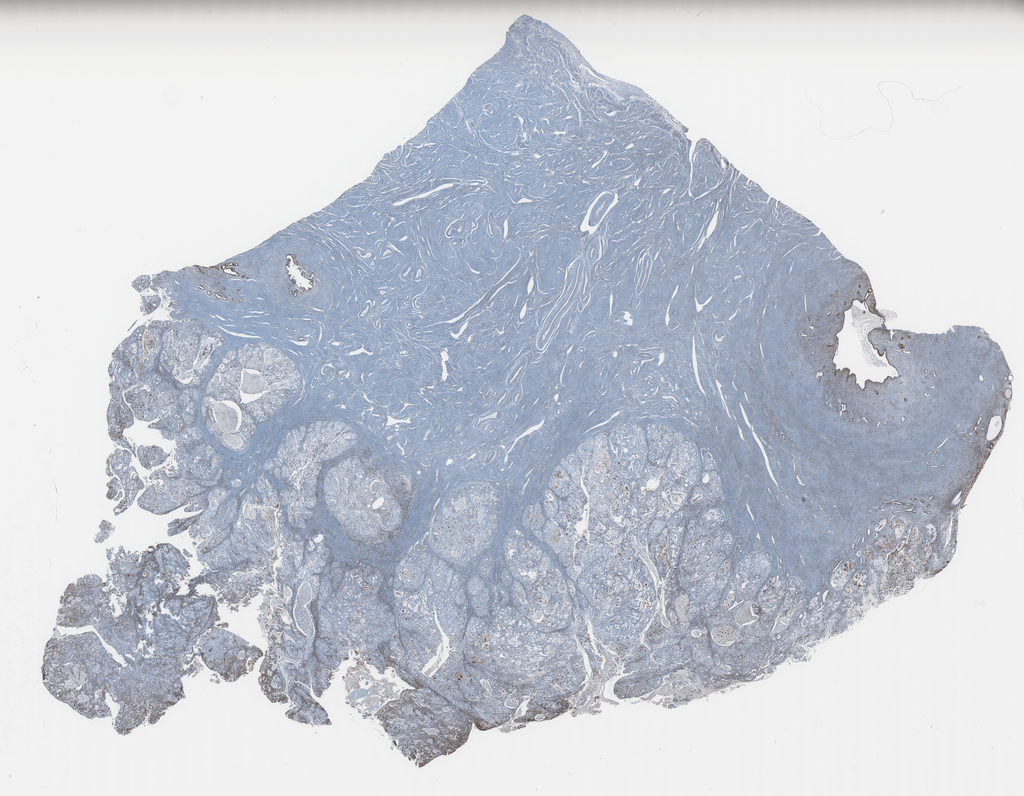

In [3]:
slide.get_thumbnail((1024,1024))

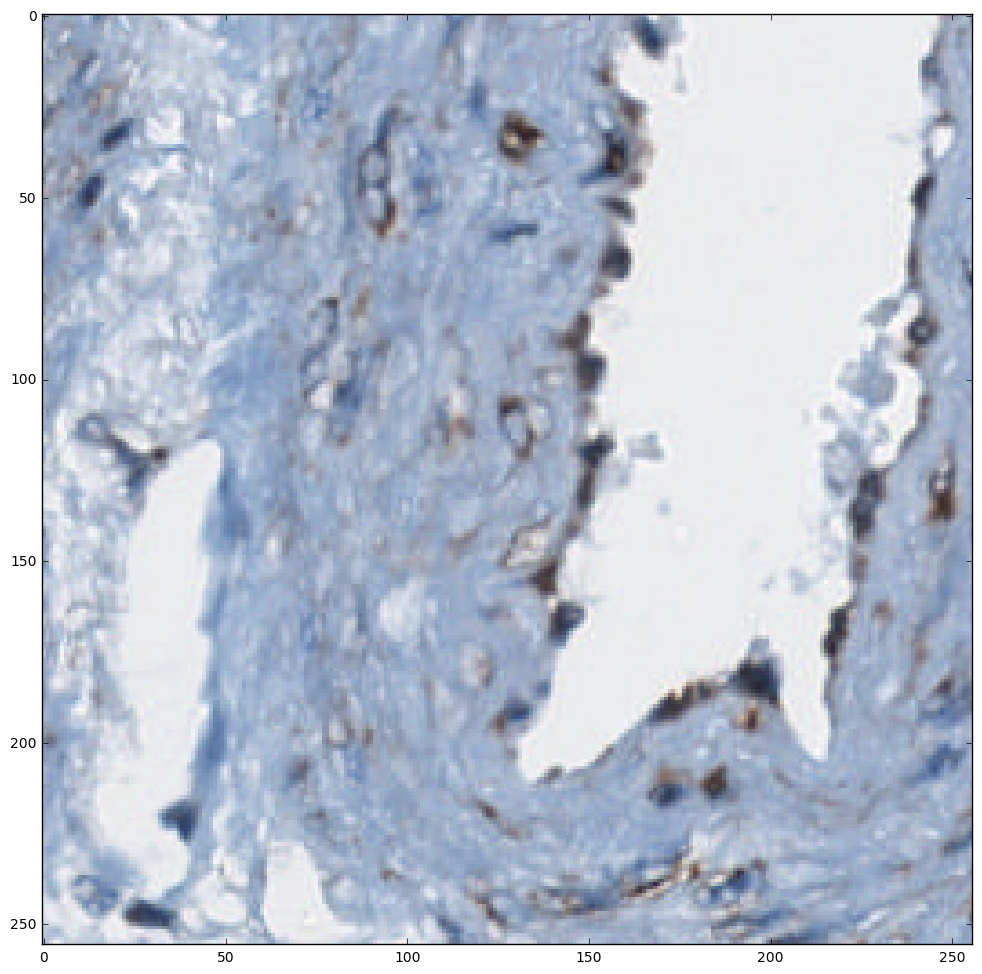

In [4]:
# read_region takes location (upper left pixel), level, and size
width = int(slide.properties['openslide.level[0].width'])
height = int(slide.properties['openslide.level[0].height'])
img = slide.read_region((width/2,height/2),0,(256,256))

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img, interpolation='nearest', aspect='equal')

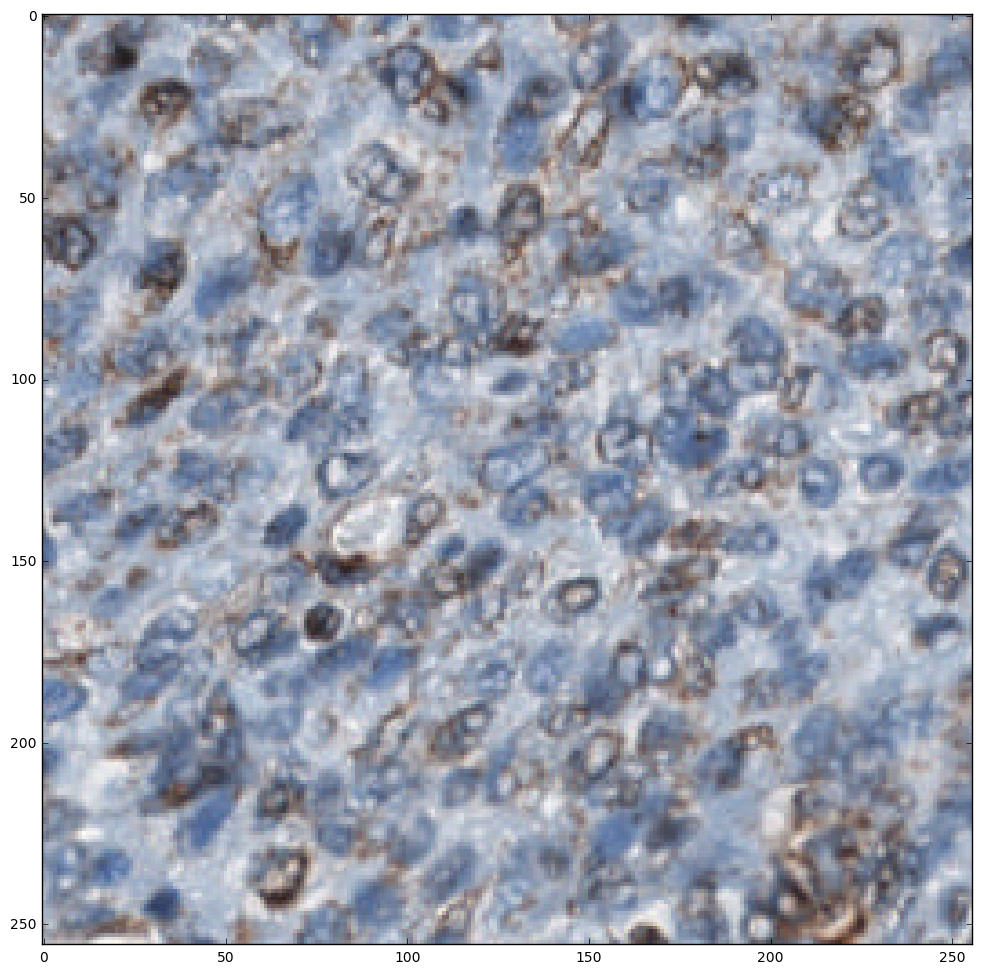

In [5]:
# read_region takes location (upper left pixel), level, and size
width = int(slide.properties['openslide.level[0].width'])
height = int(slide.properties['openslide.level[0].height'])
img2 = slide.read_region((4*(width/5),2*(height/5)),0,(256,256))

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img2,interpolation='nearest', aspect='equal')

## Define helper functions

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).astype('uint8')

In [8]:
def rgb2gray_invert(rgb):
    return 256 - np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).astype('uint8')

In [18]:
def show(pix):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(pix, interpolation='nearest', aspect='equal')

## Process the image to make nuclei easier to identify

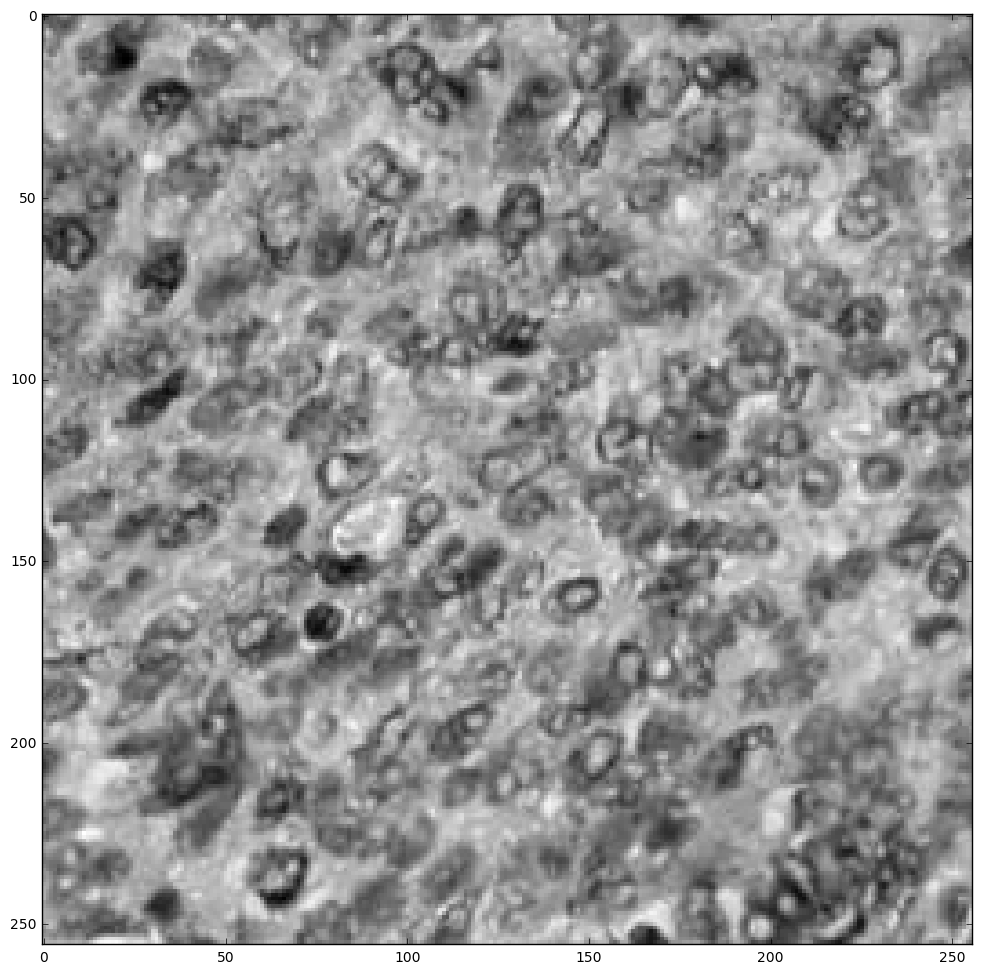

In [20]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray(pix2)

plt.gray() # by default, pyplot shows grayscale images as heatmaps
show(graypix2)

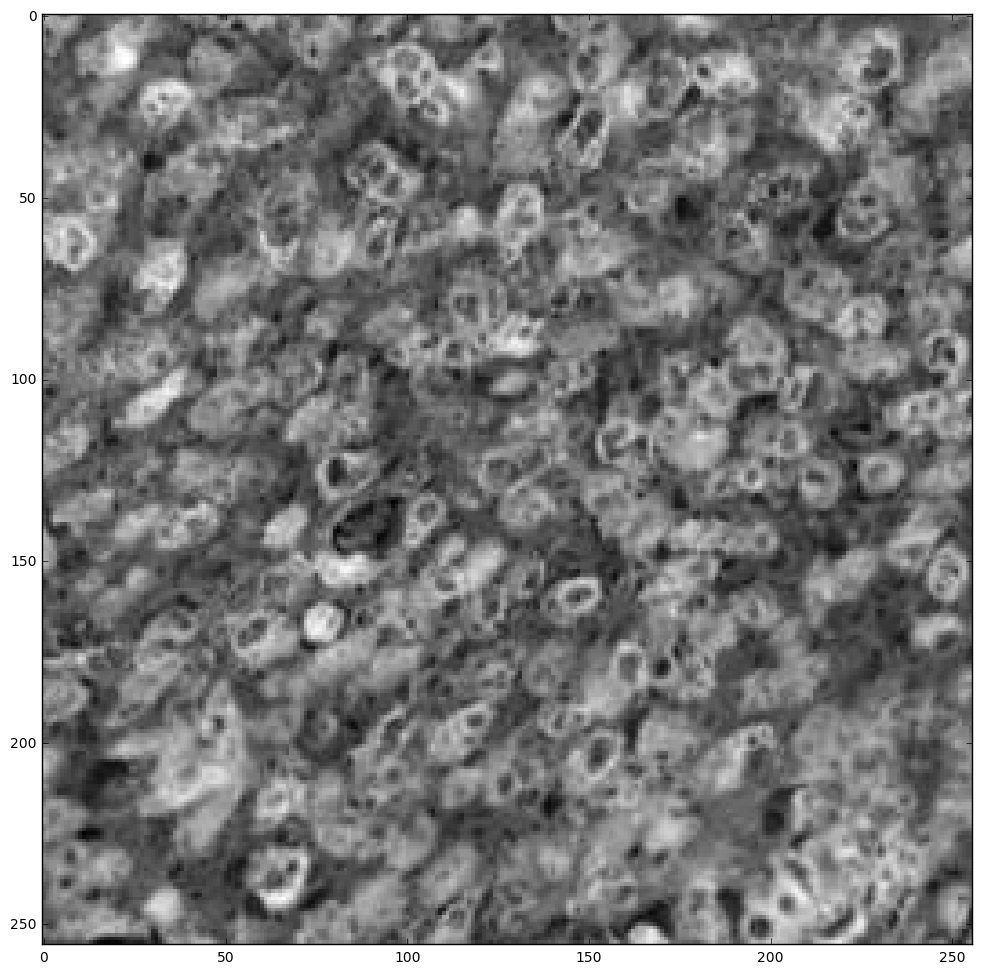

In [21]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray_invert(pix2)

show(graypix2)

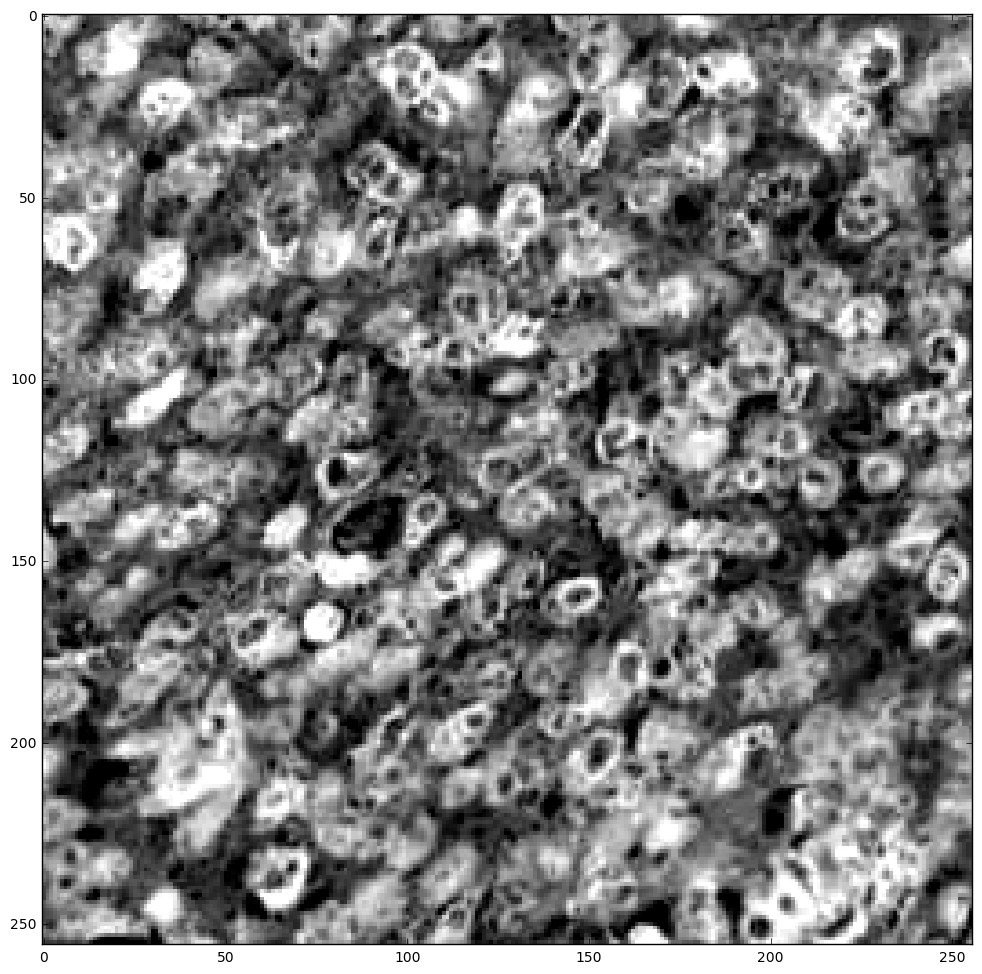

In [23]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray_invert(pix2)

# apply some contrast stretching
p2, p98 = np.percentile(graypix2, (2, 98))
graypix2_rescale = exposure.rescale_intensity(graypix2, in_range=(p2, p98))

show(graypix2_rescale)

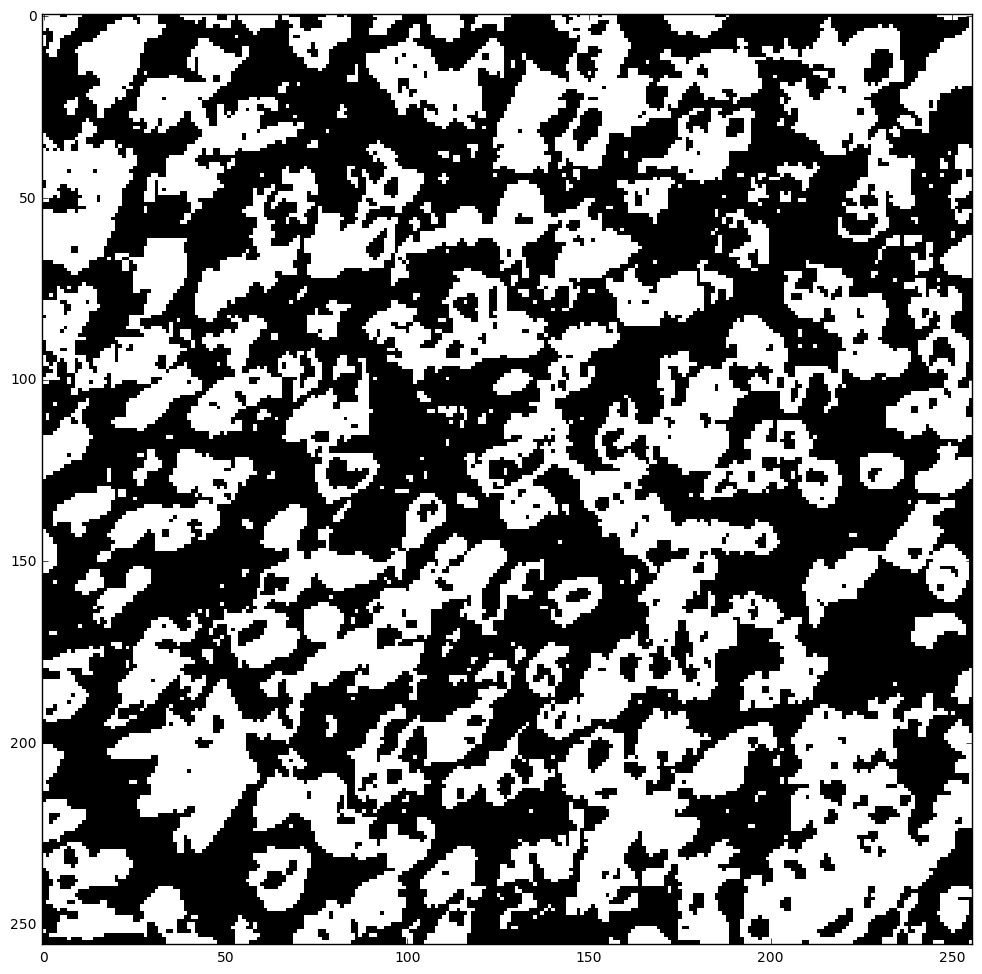

In [24]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray_invert(pix2)

# apply some contrast stretching
p2, p98 = np.percentile(graypix2, (2, 98))
graypix2_rescale = exposure.rescale_intensity(graypix2, in_range=(p2, p98))

# threshold the image
T = mh.thresholding.otsu(graypix2_rescale)

show(graypix2_rescale > T)

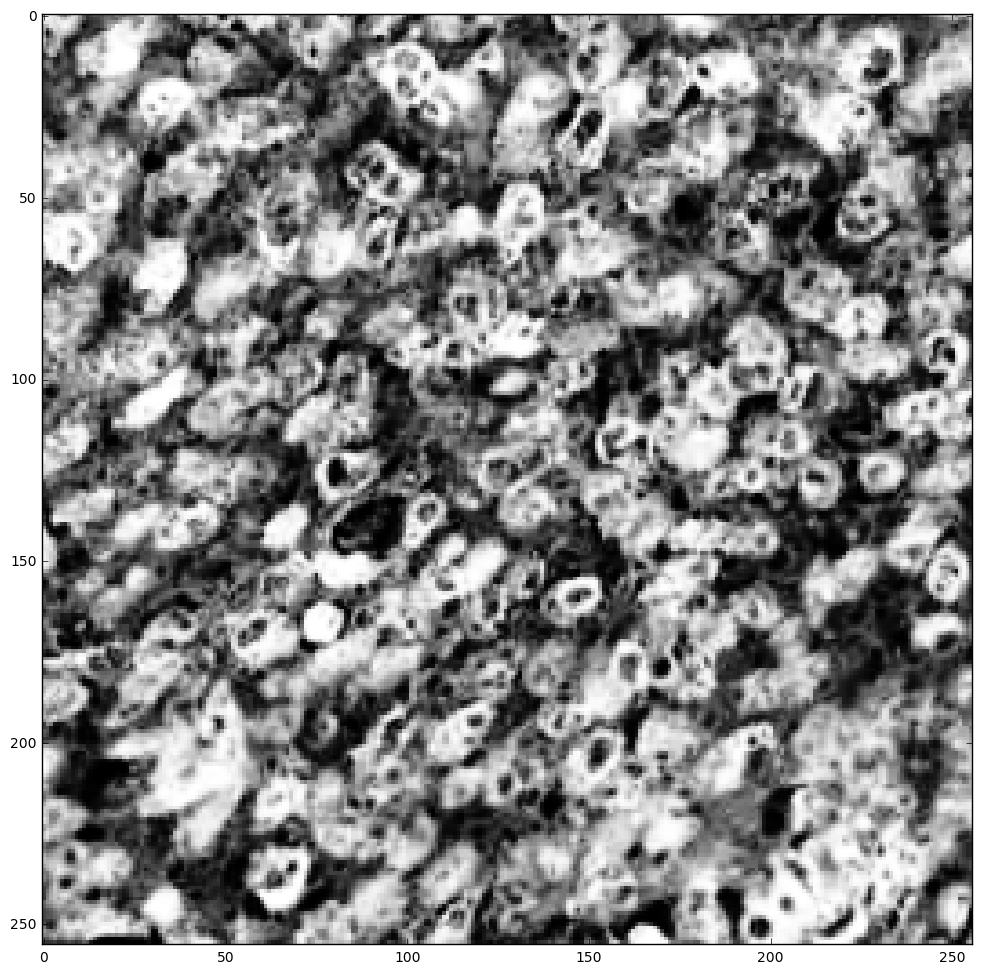

In [25]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray_invert(pix2)

# Equalization
graypix2_rescale = exposure.equalize_hist(graypix2)

show(graypix2_rescale)

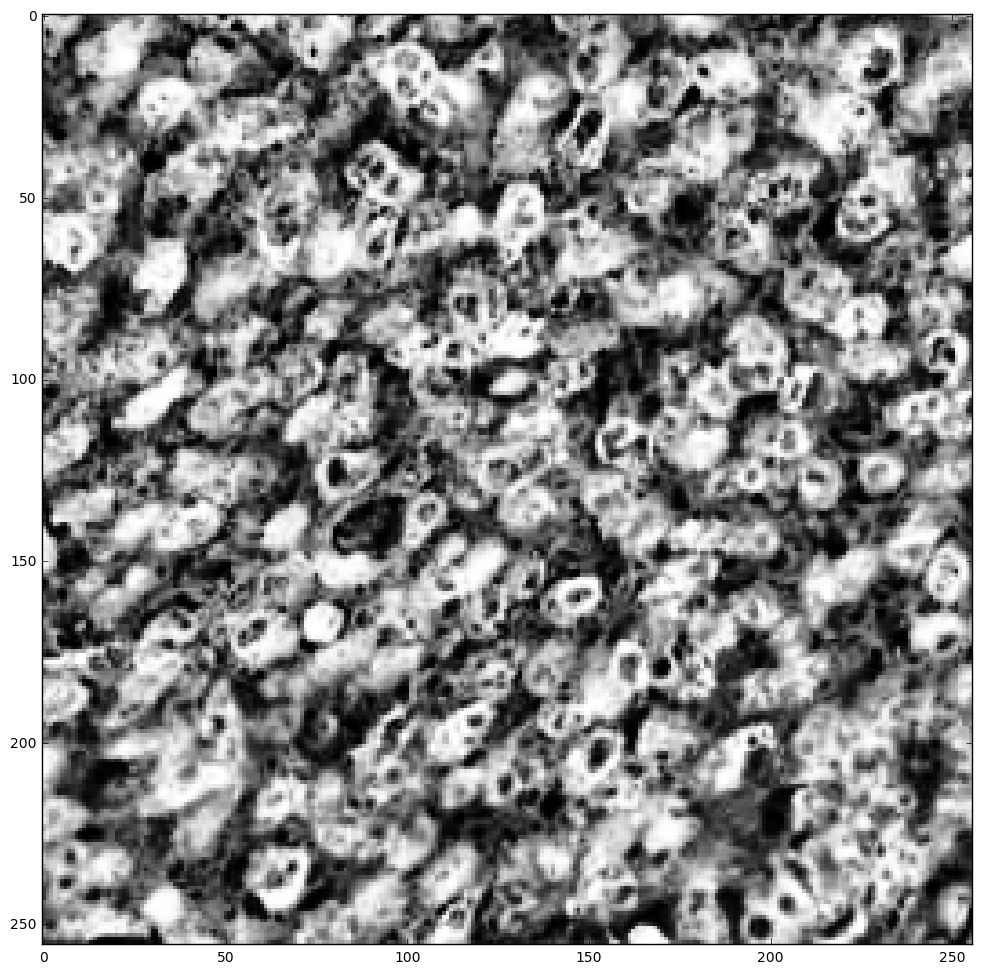

In [26]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray_invert(pix2)

# Adaptive Equalization
graypix2_rescale = exposure.equalize_adapthist(graypix2, clip_limit=0.03)

show(graypix2_rescale)

## Apply some filtering

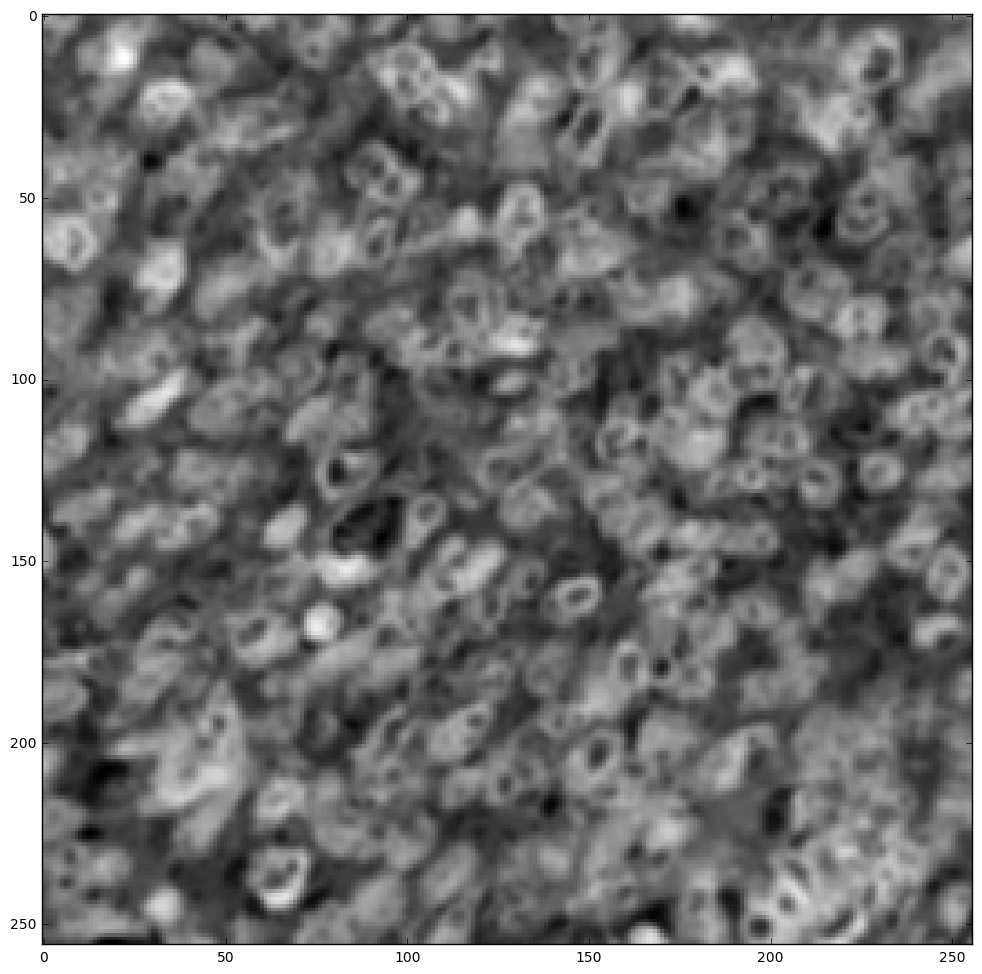

In [28]:
# Convert to unsigned int (256 grayscale) from color
pix2 = np.array(img2)
graypix2 = rgb2gray_invert(pix2)

gp2_gauss = mh.gaussian_filter(graypix2, 1)
show(gp2_gauss)